In [14]:

import sympy as sp
from scipy import *
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML, Math
import numpy as np
import pandas as pd
from sympy import Rational as R

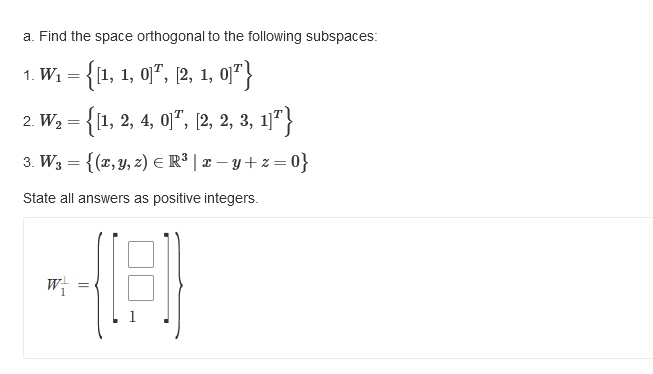

In [15]:
# a)
W1 = Matrix([[1,1,0], [2,1,0]]).T
W2 = Matrix([[1,2,4,0], [2,2,3,1]]).T
W3 = Matrix([1, -1, 1])

# We use "the trick" where just find the nullspace of the transpose since this will be
# the orthogonal complement.
W1C = W1.T.nullspace()[0]
W2C = W2.T.nullspace()
W3C = W3.T.nullspace()
W1C, (2*W2C[0], 2*W2C[1]), W3C

⎛     ⎛⎡2 ⎤  ⎡-2⎤⎞             ⎞
⎜⎡0⎤  ⎜⎢  ⎥  ⎢  ⎥⎟  ⎡⎡1⎤  ⎡-1⎤⎤⎟
⎜⎢ ⎥  ⎜⎢-5⎥  ⎢1 ⎥⎟  ⎢⎢ ⎥  ⎢  ⎥⎥⎟
⎜⎢0⎥, ⎜⎢  ⎥, ⎢  ⎥⎟, ⎢⎢1⎥, ⎢0 ⎥⎥⎟
⎜⎢ ⎥  ⎜⎢2 ⎥  ⎢0 ⎥⎟  ⎢⎢ ⎥  ⎢  ⎥⎥⎟
⎜⎣1⎦  ⎜⎢  ⎥  ⎢  ⎥⎟  ⎣⎣0⎦  ⎣1 ⎦⎦⎟
⎝     ⎝⎣0 ⎦  ⎣2 ⎦⎠             ⎠

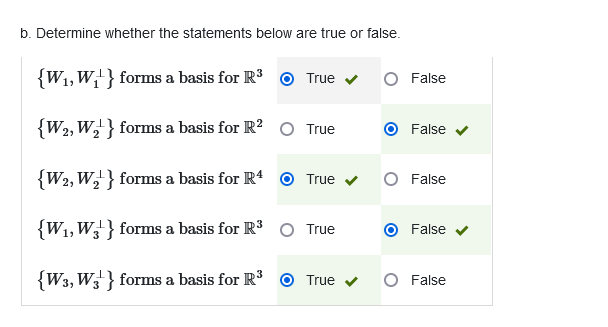

In [16]:
def pivots(M, n):
    p = len(M.rref()[1])
    return p == n

In [17]:
# b)

# We must check 3 things (technically 2):
    # 1) Make sure that the number entries (i.e. number of rows) match the dimension of the space we are interested in
    # 2) Make sure that we have as many pivots as the dimension from (1)
    # 3) Make sure we have no more columns than pivots, since then it would not be a basis
    
V1 = Matrix.hstack(W1, W1C)
V2 = Matrix.hstack(W2, W2C[0], W2C[1])
V3 = Matrix.hstack(W2, W2C[0], W2C[1])
V4 = Matrix.hstack(W1, W3C[0], W3C[1])
V5 = Matrix.hstack(W3, W3C[0], W3C[1])

display(
    V1.shape[0] == 3 and pivots(V1, 3) and V1.shape[1] == 3,
    V2.shape[0] == 2 and pivots(V2, 2) and V2.shape[1] == 2,
    V3.shape[0] == 4 and pivots(V3, 4) and V3.shape[1] == 4,
    V4.shape[0] == 3 and pivots(V4, 3) and V4.shape[1] == 3,
    V5.shape[0] == 3 and pivots(V5, 3) and V5.shape[1] == 3
)

True

False

True

False

True

In [18]:
# Many thought V4 was a basis since it spans all of R^3, but it consists of 4 vectors,
# so it fails the definition of a basis which is the MINIMUM number of vectors in order to span a vector space.
# The MIN here would be 3 vectors.

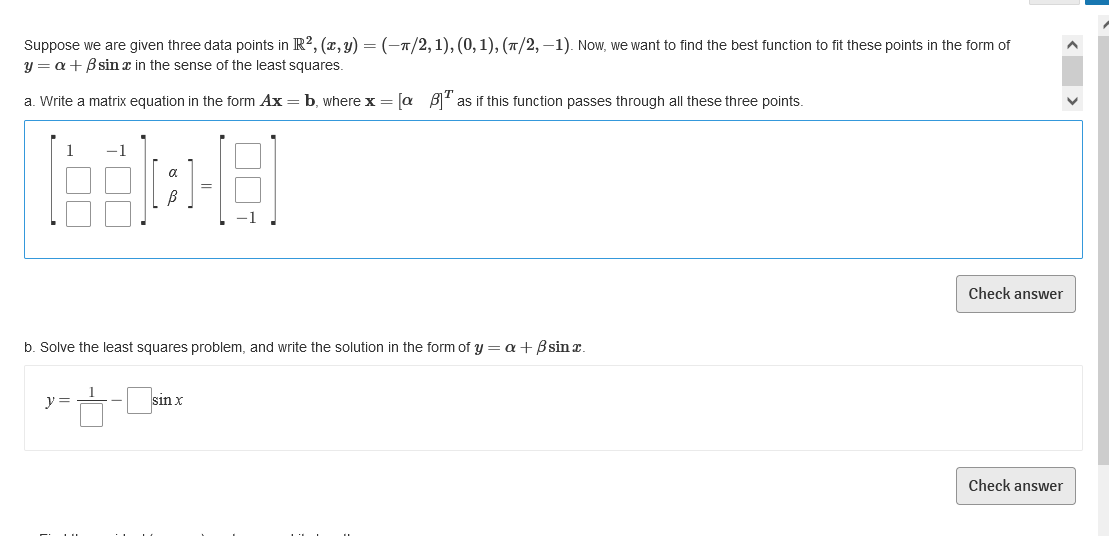

In [19]:
# a)

x = pd.DataFrame([
    math.sin(-math.pi / 2),
    math.sin(0),
    math.sin(math.pi / 2)
])
y = pd.DataFrame([
    1,
    1,
    -1,
])

X = x.astype(int)
X1 = Matrix([ones(len(x), 1)]).row_join(Matrix((X)))

display(Math(latex(X1) + r'\left[\begin{array}{l}\alpha \\ \beta \end{array}\right] = ' + latex(Matrix(y))))

<IPython.core.display.Math object>

In [20]:
# b)
X1tX1 = X1.T*X1
X1ty = X1.T*Matrix(y)
Mat, _ = X1tX1.row_join(X1ty).rref()
B1 = Mat[:,-1]
display(Latex("$$y = {}{}sin x$$".format(latex(B1[0]), B1[1])))

<IPython.core.display.Latex object>

In [21]:
# c)
Y = Matrix(y)
display(Latex("$$\epsilon = {}$$".format(latex(Y-X1*B1))))
display(Latex("$$e = {}$$".format(latex((Y-X1*B1).norm()))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

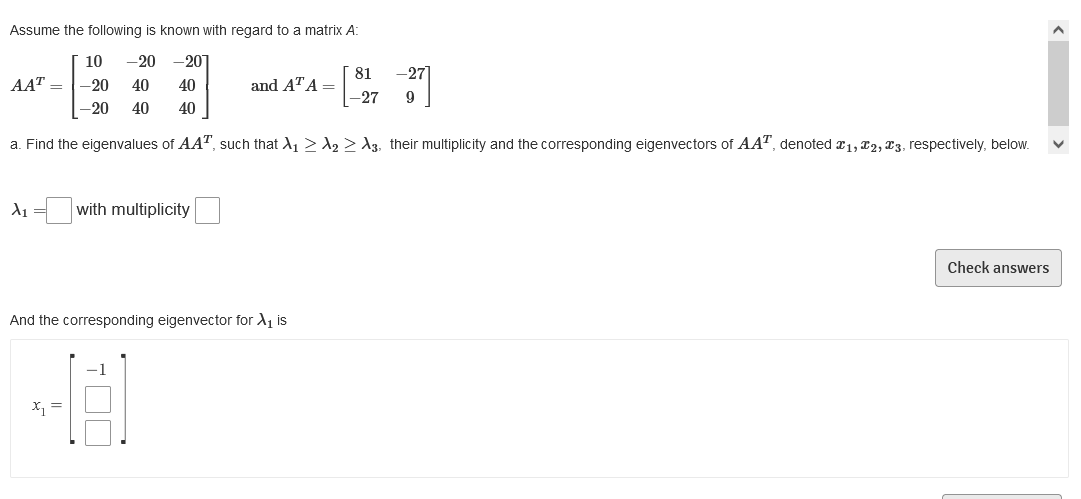

In [26]:
AAT = Matrix([[10,-20,-20], [-20,40,40], [-20,40,40]])
ATA = Matrix([[81,-27], [-27,9]])
vecs = AAT.eigenvects()
vecs

⎡⎛      ⎡⎡2⎤  ⎡2⎤⎤⎞  ⎛       ⎡⎡-1/2⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥  ⎢ ⎥⎥⎟  ⎜       ⎢⎢    ⎥⎥⎟⎥
⎢⎜0, 2, ⎢⎢1⎥, ⎢0⎥⎥⎟, ⎜90, 1, ⎢⎢ 1  ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥  ⎢ ⎥⎥⎟  ⎜       ⎢⎢    ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦  ⎣1⎦⎦⎠  ⎝       ⎣⎣ 1  ⎦⎦⎠⎦

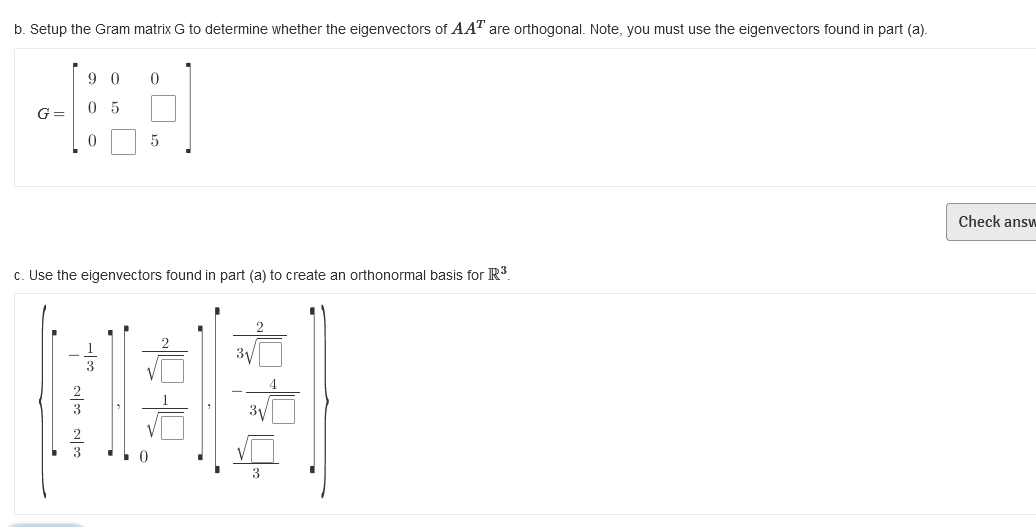

In [27]:
# b)
# The Gram matrix, as mentioned, is AtA. Some thought it had something to do with Gram Schmidt
# The Gram Matrix is the matrix you set up to test whether a set of vectors are orthogonal
# In class we did U.T * U:
x1 = 2*vecs[1][2][0]
x2 = vecs[0][2][0]
x3 = vecs[0][2][1]
X = Matrix.hstack(x1, x2, x3) 
X, (X.T * X)

⎛⎡-1  2  2⎤  ⎡9  0  0⎤⎞
⎜⎢        ⎥  ⎢       ⎥⎟
⎜⎢2   1  0⎥, ⎢0  5  4⎥⎟
⎜⎢        ⎥  ⎢       ⎥⎟
⎝⎣2   0  1⎦  ⎣0  4  5⎦⎠

In [28]:
# c)
# From above we see that the vectors are not orthogonal, more specifically
# x2 and x3 are not ortogonal to each other
# We use Gram Schmidt to fix this
u1 = vecs[1][2][0].normalized()
u2 = GramSchmidt([x2, x3], True)[0]
u3 = GramSchmidt([x2, x3], True)[1]
U = Matrix.hstack(u1, u2, u3) 
u1, u2, u3

⎛                ⎡ 2⋅√5 ⎤⎞
⎜        ⎡2⋅√5⎤  ⎢ ──── ⎥⎟
⎜        ⎢────⎥  ⎢  15  ⎥⎟
⎜⎡-1/3⎤  ⎢ 5  ⎥  ⎢      ⎥⎟
⎜⎢    ⎥  ⎢    ⎥  ⎢-4⋅√5 ⎥⎟
⎜⎢2/3 ⎥, ⎢ √5 ⎥, ⎢──────⎥⎟
⎜⎢    ⎥  ⎢ ── ⎥  ⎢  15  ⎥⎟
⎜⎣2/3 ⎦  ⎢ 5  ⎥  ⎢      ⎥⎟
⎜        ⎢    ⎥  ⎢  √5  ⎥⎟
⎜        ⎣ 0  ⎦  ⎢  ──  ⎥⎟
⎝                ⎣  3   ⎦⎠

In [ ]:
# d)
# Since AAt is 3 x 3 and AtA is 2 x 2, A must be 3 x 2
# Since only 1 non-zero singular value, rank = 1
# m (number of columns) = dim nul A + dim col A (Rank) so dim nul A = 1
# dim Row is the same as Rank, so 1
# dim Nul A.T is 2 since it is n - rank = 2

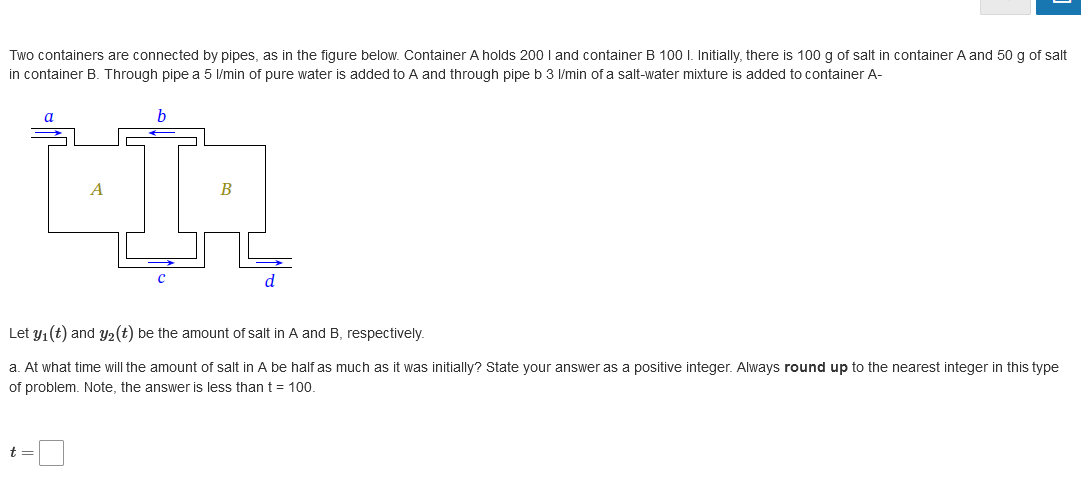

In [29]:
t = symbols('t', positive=True)
y1, y2 = symbols('y1 y2', cls=Function)

eq1 = Eq(y1(t).diff(t), -(8/200)*y1(t) + (3/100)*y2(t))
eq2 = Eq(y2(t).diff(t), (8/200)*y1(t) - (8/100)*y2(t))

# Solve
solutions = dsolve([eq1, eq2], [y1(t), y2(t)], ics={y1(0): 100, y2(0): 50})
y1_sol = solutions[0].rhs
y2_sol = solutions[1].rhs

# Find when salt in tank A is half the initial amount (50g)
half_salt_time = solve(Eq(y1_sol, 50), t)
t_half = float([sol for sol in half_salt_time if sol.is_real and sol > 0][0])

print(f"Time when salt in A = 50g: {round(t_half)} minutes")

Time when salt in A = 50g: 32 minutes


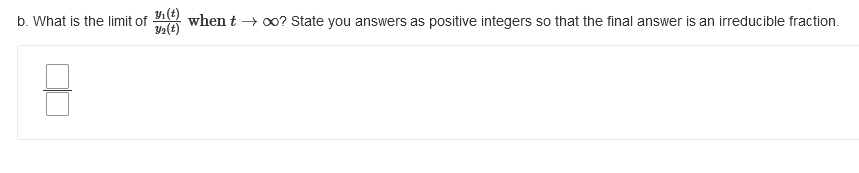

In [31]:
# b. Limit as t → ∞
ratio_limit = limit(y1_sol/y2_sol, t, oo)


print(f"c. Limit = {ratio_limit}")

c. Limit = 3/2
